# King County Real Estate - Housing Analysis

## Business Question:

King County Real Estate has hired us to investigate which features of a home have the greatest effect on price.

* They would like us to make a model to predict housing prices.
* From that model, they would like to know which factors have the largest effect on price.

## Data Importing & Cleaning

The dataset "kc_house_data.csv" was obtained from the link below. King County 2014-2015 House Sales dataset

https://osf.io/twq9p/

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


sns.set_style("whitegrid")
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)})

##### The following is a function to download via pandas csv, excel, or json files to jupyter notebook:

In [2]:
def files_import_pd(file_path):
    if file_path.endswith("csv"):
        return pd.read_csv(file_path)
    if file_path.endswith("tsv"):
        return pd.read_csv(file_path, sep="\t")
    if file_path.endswith("xlsx"):
        return pd.read_excel(file_path)
    if file_path.endswith("json"):
        return pd.read_json(file_path)
    else:
        print("NOT CSV/TSV/EXCEL/JSON FILE")

In [3]:
df1 = files_import_pd(r"C:\Users\bigbenx3\2021_flatiron\flatiron_projects\housing_analysis_project\kc_house_data.csv")
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Good. Imported the first dataframe. Let's look at its contents.
***Objective: Checking for nulls.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Also, there are datatypes for the values within the columns that we may want to change, for example "price".

In [5]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So it appears there are no missing/ empty values.

## Data - Manipulation

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

So, there are 21 columns, aka our features, and we don't need all of them.

First We're going to remove the columns for features we aren't accounting for. This is in the interest of time and simplicity of the model.

In [7]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Also, in other words, we'll only keep a select number of columns.

In [8]:
df = df1[["sqft_lot", "sqft_living",
                    "grade", "condition", "bathrooms", "bedrooms",
                    "waterfront", "price", "floors", "lat", "long"]]

We are eliminating the columns below:


yr_built

date

view

sqft_above

sqft_basement

yr_renovated

zipcode

lat

long

sqft_living15

sqft_lot15

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   grade        21613 non-null  int64  
 3   condition    21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   bedrooms     21613 non-null  int64  
 6   waterfront   21613 non-null  int64  
 7   price        21613 non-null  float64
 8   floors       21613 non-null  float64
 9   lat          21613 non-null  float64
 10  long         21613 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


From 21 to 11 columns to account for.

## Exploratory Analysis

We want to get a sense of the data, the values, for each feature and remove the outliers in preparation to building a model.

Before, that we want to change the datatypes for some the columns, for example "price".

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   grade        21613 non-null  int64  
 3   condition    21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   bedrooms     21613 non-null  int64  
 6   waterfront   21613 non-null  int64  
 7   price        21613 non-null  float64
 8   floors       21613 non-null  float64
 9   lat          21613 non-null  float64
 10  long         21613 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


In [11]:
df["price"] = df["price"].astype(int)

<ipython-input-11-d7d05832fc73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   grade        21613 non-null  int64  
 3   condition    21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   bedrooms     21613 non-null  int64  
 6   waterfront   21613 non-null  int64  
 7   price        21613 non-null  int32  
 8   floors       21613 non-null  float64
 9   lat          21613 non-null  float64
 10  long         21613 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.7 MB


We may need to change the other features into another datatype. For now, this will do.

#### Prices Overview

The dependent variable here is price of the homes. Let's get a sense of the prices.

In [13]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

count    21,600

mean     540,000

std      367,000

min      75,000

25%      321,900

50%      450,000

75%      645000

max      7,700,000

(USD) 2014-2015
King County, Washington 98001

It's easier to see now the corresponding numerical values.

<AxesSubplot:xlabel='price', ylabel='Count'>

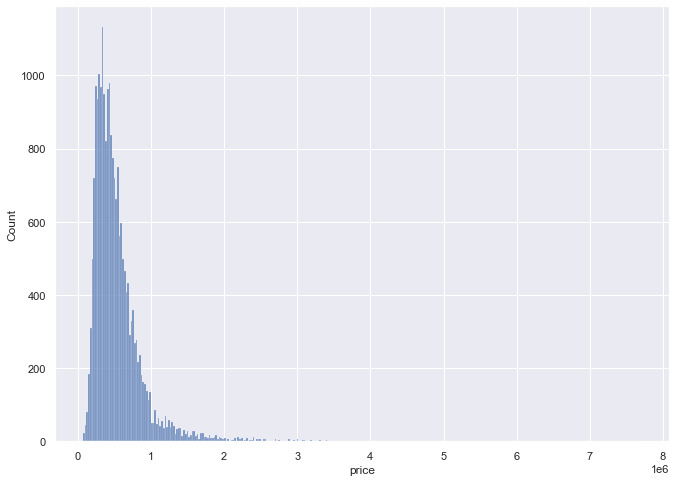

In [14]:
sns.histplot(df.price)

https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244

In [15]:
q3, q1 = np.percentile(df["price"], [75 ,25])
iqr = q3 - q1
iqr

323050.0

323050 is the interquartile range.

In [16]:
q3

645000.0

Oh, ok- the 75percentile.

In [17]:
q1

321950.0

And the 25percentile. 

In [18]:
323050*1.5

484575.0

This number will allow us to find the range that are outliers.

Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

Calculate the interquartile range for the data.

Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).

Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.

Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.


https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244

In [19]:
645000+484575.0

1129575.0

In [20]:
321950-484575.0

-162625.0

So regarding "price" values, any home price < -162625 and > 1129575 are outliers.
And since we don't deal with negative numbers with price, we'll ignore the < -162625 part.

In [21]:
import pandas as pd
df_price_unique_values = df["price"].unique()
print(sorted(df_price_unique_values))

[75000, 78000, 80000, 81000, 82000, 82500, 83000, 84000, 85000, 86500, 89000, 89950, 90000, 92000, 95000, 96500, 99000, 100000, 102500, 104950, 105000, 105500, 106000, 107000, 109000, 109500, 110000, 110700, 111300, 112000, 114000, 114975, 115000, 118000, 118125, 119500, 119900, 120000, 120750, 121800, 122000, 123000, 123300, 124000, 124500, 124740, 125000, 126000, 126500, 128000, 128750, 129000, 129888, 130000, 132500, 132825, 133000, 133400, 134000, 135000, 135900, 136500, 137000, 137124, 137900, 139000, 139500, 139950, 140000, 141800, 142000, 142500, 143000, 144000, 144975, 145000, 145600, 146000, 146300, 147000, 147200, 147400, 147500, 148000, 148226, 148900, 149000, 149500, 149900, 150000, 150550, 151000, 151100, 151600, 152000, 152275, 152500, 152900, 153000, 153500, 153503, 154000, 154200, 154500, 154950, 155000, 156000, 156601, 157000, 157340, 157500, 158000, 158550, 158800, 159000, 159075, 159100, 159995, 160000, 160134, 160797, 161000, 161500, 161700, 162000, 162248, 162500, 

Again, ignoring the negative range because our prices start at 75,000. so let's drop values greater than 1129575.

However, let's double check on how many entries we will be discarding before we do so.

In [22]:
price_counts = df.groupby("price")["price"].agg("count").sort_values(ascending=True)
price_counts

price
75000       1
607010      1
608095      1
608250      1
608500      1
         ... 
425000    150
500000    152
550000    159
350000    172
450000    172
Name: price, Length: 4028, dtype: int64

In [23]:
pd.set_option("display.max_rows", 5000)

In [24]:
price_counts = df.groupby("price")["price"].agg("count").sort_values(ascending=False)
price_counts

price
450000     172
350000     172
550000     159
500000     152
425000     150
325000     148
400000     145
375000     138
300000     133
525000     131
250000     130
475000     120
330000     119
650000     117
275000     113
315000     111
415000     111
280000     110
390000     110
600000     110
440000     109
320000     108
435000     105
340000     103
310000     101
335000      98
420000      97
360000      96
265000      95
260000      95
380000      93
625000      93
575000      93
305000      92
530000      91
345000      91
430000      91
270000      90
700000      89
465000      89
245000      89
490000      88
370000      88
290000      88
750000      87
355000      87
385000      86
255000      86
410000      86
230000      85
225000      83
515000      83
485000      82
235000      81
480000      81
240000      80
285000      80
405000      79
460000      78
535000      78
540000      78
365000      78
560000      76
580000      75
445000      75
295000      74
5100

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   grade        21613 non-null  int64  
 3   condition    21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   bedrooms     21613 non-null  int64  
 6   waterfront   21613 non-null  int64  
 7   price        21613 non-null  int32  
 8   floors       21613 non-null  float64
 9   lat          21613 non-null  float64
 10  long         21613 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.7 MB


Since price values greater than 1129575 are outliers, we have to keep values less than or equal to 1129575.

In [26]:
df_outliers_rmvd = df[df["price"] <= 1129575]
df_outliers_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     20467 non-null  int64  
 1   sqft_living  20467 non-null  int64  
 2   grade        20467 non-null  int64  
 3   condition    20467 non-null  int64  
 4   bathrooms    20467 non-null  float64
 5   bedrooms     20467 non-null  int64  
 6   waterfront   20467 non-null  int64  
 7   price        20467 non-null  int32  
 8   floors       20467 non-null  float64
 9   lat          20467 non-null  float64
 10  long         20467 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.8 MB


<AxesSubplot:xlabel='price', ylabel='Count'>

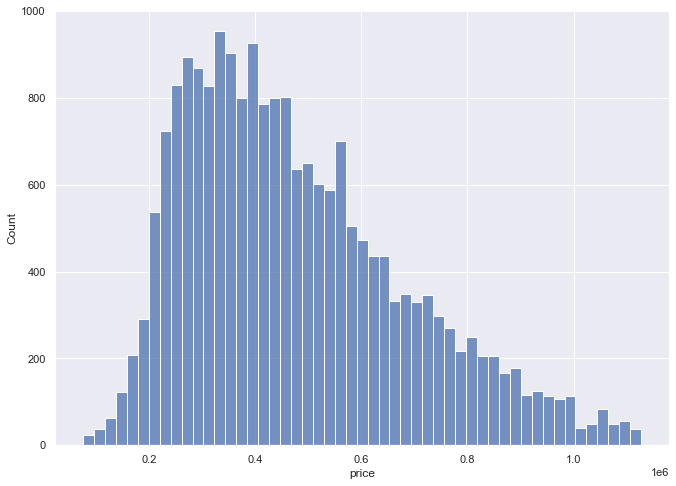

In [27]:
sns.histplot(df_outliers_rmvd.price)

Our new visual plot. Not the best, but with the outliers removed, it'll work for now.

In [28]:
df_outliers_rmvd.price.describe()

count    2.046700e+04
mean     4.769846e+05
std      2.083713e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.127500e+06
Name: price, dtype: float64

Now, trying to simplify the code: This will be out reuseable template for the other features.

In [29]:
q3, q1 = np.percentile(df_outliers_rmvd["price"], [75 ,25])
iqr = q3 - q1
print("iqr=", iqr)
print("q3=", q3)
print("q1=", q1)
print("constant=", iqr*1.5)

iqr= 285000.0
q3= 600000.0
q1= 315000.0
constant= 427500.0


In [30]:
print("suspected outliers are greater than this number:", q3+(iqr*1.5))
print("suspected outliers are less than this number", q1-(iqr*1.5))

suspected outliers are greater than this number: 1027500.0
suspected outliers are less than this number -112500.0


<b>So regarding "price", any price value < -162625 and > 1129575 are outliers.</b>

Trying to create a reuseable template. We'll try it with Living Space Square Footage.

#### Living Space Square Footage

In [31]:
df_outliers_rmvd.sqft_living.describe()

count    20467.000000
mean      1975.558167
std        774.833460
min        290.000000
25%       1400.000000
50%       1860.000000
75%       2431.000000
max       7480.000000
Name: sqft_living, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

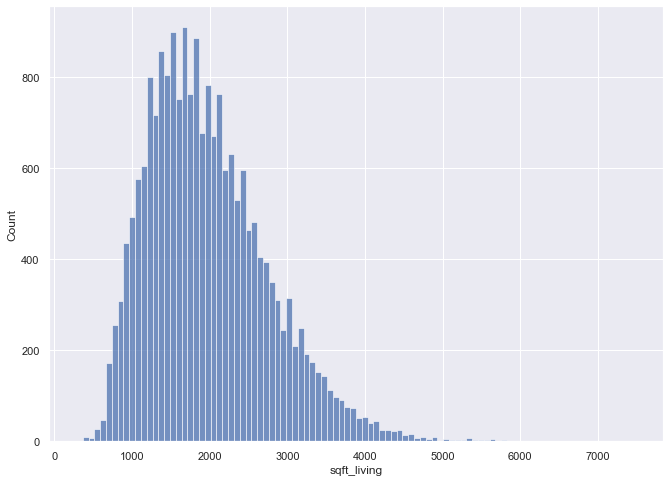

In [32]:
sns.histplot(df_outliers_rmvd["sqft_living"])

Now, trying to take out the outliers to hopefully normalize the distribution.

In [33]:
q3, q1 = np.percentile(df_outliers_rmvd["sqft_living"], [75 ,25])
iqr = q3 - q1
print("iqr=", iqr)
print("q3=", q3)
print("q1=", q1)
print("constant=", iqr*1.5)

iqr= 1031.0
q3= 2431.0
q1= 1400.0
constant= 1546.5


In [34]:
print("suspected outliers are greater than this number:", q3+(iqr*1.5))
print("suspected outliers are less than this number", q1-(iqr*1.5))

suspected outliers are greater than this number: 3977.5
suspected outliers are less than this number -146.5


So regarding "sqft_living", any sqft_living value < -146.5 and > 3977.5 are outliers. Again, any negative numbers, we can sort of ignore, unless negative values start appearing on our histogram plot.

Let's remove the outliers.

In [35]:
df_outliers_rmvd = df_outliers_rmvd[df_outliers_rmvd["sqft_living"] <= 3977.5]
df_outliers_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20147 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     20147 non-null  int64  
 1   sqft_living  20147 non-null  int64  
 2   grade        20147 non-null  int64  
 3   condition    20147 non-null  int64  
 4   bathrooms    20147 non-null  float64
 5   bedrooms     20147 non-null  int64  
 6   waterfront   20147 non-null  int64  
 7   price        20147 non-null  int32  
 8   floors       20147 non-null  float64
 9   lat          20147 non-null  float64
 10  long         20147 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.8 MB


Let's see the new histogram plot.

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

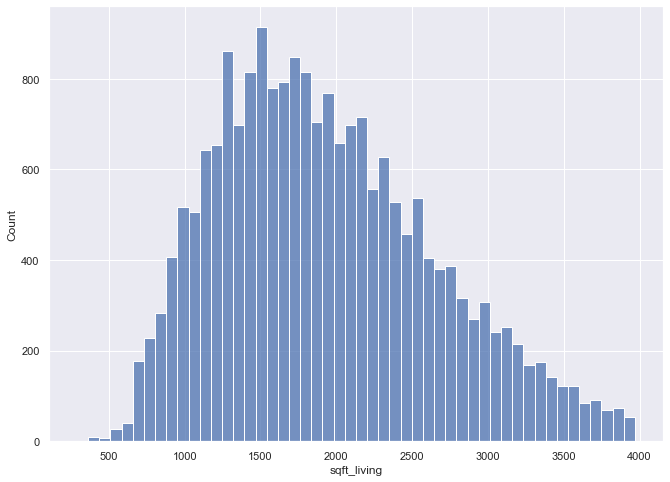

In [36]:
sns.histplot(df_outliers_rmvd["sqft_living"])

Still a bit crude but we can work with that for now.

#### Lot Square Footage

In [37]:
df_outliers_rmvd.sqft_lot.describe()

count    2.014700e+04
mean     1.399957e+04
std      3.787604e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.482000e+03
75%      1.020000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

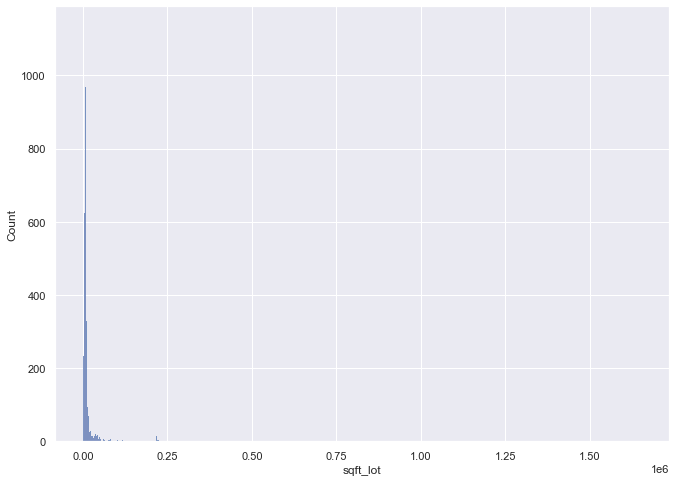

In [38]:
sns.histplot(df_outliers_rmvd["sqft_lot"])

Now, trying to take out the outliers to hopefully normalize the distribution.

In [39]:
q3, q1 = np.percentile(df_outliers_rmvd["sqft_lot"], [75 ,25])
iqr = q3 - q1
print("iqr=", iqr)
print("q3=", q3)
print("q1=", q1)
print("constant=", iqr*1.5)

iqr= 5200.0
q3= 10200.0
q1= 5000.0
constant= 7800.0


In [40]:
print("suspected outliers are greater than this number:", q3+(iqr*1.5))
print("suspected outliers are less than this number", q1-(iqr*1.5))

suspected outliers are greater than this number: 18000.0
suspected outliers are less than this number -2800.0


So regarding "sqft_living", any sqft_living value < -2800.0 and > 18000.0 are outliers. Again, any negative numbers, we can sort of ignore, unless negative values start appearing on our histogram plot.

Let's remove the outliers.

In [41]:
df_outliers_rmvd = df_outliers_rmvd[df_outliers_rmvd["sqft_lot"] <= 18000]
df_outliers_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18032 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     18032 non-null  int64  
 1   sqft_living  18032 non-null  int64  
 2   grade        18032 non-null  int64  
 3   condition    18032 non-null  int64  
 4   bathrooms    18032 non-null  float64
 5   bedrooms     18032 non-null  int64  
 6   waterfront   18032 non-null  int64  
 7   price        18032 non-null  int32  
 8   floors       18032 non-null  float64
 9   lat          18032 non-null  float64
 10  long         18032 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.6 MB


Let's see the new histogram plot.

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

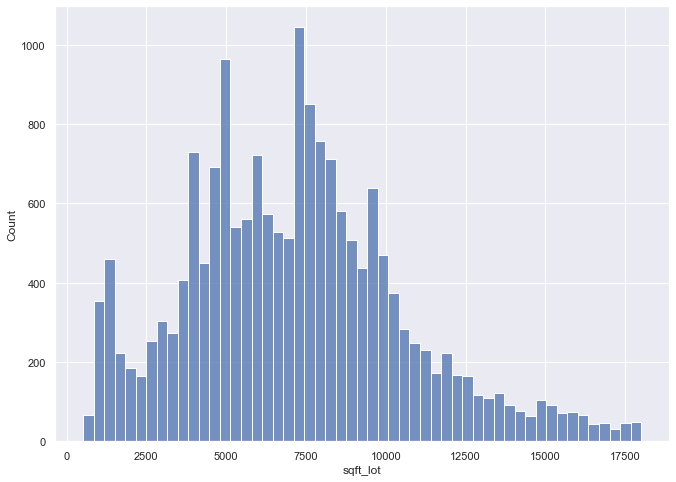

In [42]:
sns.histplot(df_outliers_rmvd["sqft_lot"])

Still a bit crude but we can work with that for now.

And since lot_sqftspace is a bit difficult to discern for a general correlation, we might just scratch the feature altogether towards the end.

#### Bedrooms

In [43]:
df_outliers_rmvd.bedrooms.describe()

count    18032.000000
mean         3.300909
std          0.907553
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

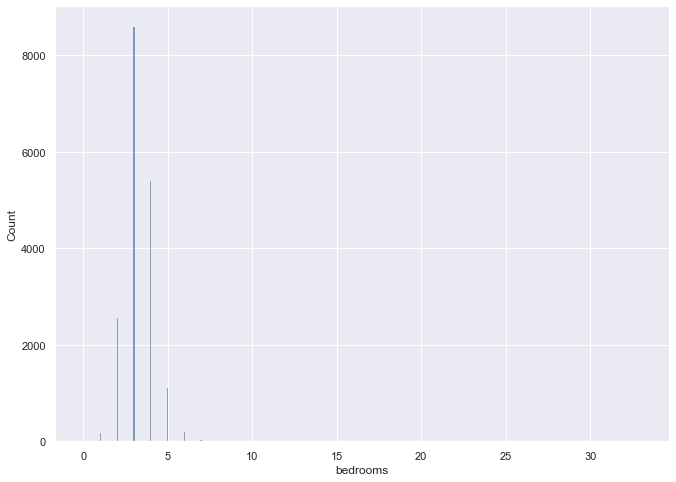

In [44]:
sns.histplot(df_outliers_rmvd["bedrooms"])

Now, trying to take out the outliers to hopefully normalize the distribution.

In [45]:
q3, q1 = np.percentile(df_outliers_rmvd["bedrooms"], [75 ,25])
iqr = q3 - q1
print("iqr=", iqr)
print("q3=", q3)
print("q1=", q1)
print("constant=", iqr*1.5)

iqr= 1.0
q3= 4.0
q1= 3.0
constant= 1.5


In [46]:
print("suspected outliers are greater than this number:", q3+(iqr*1.5))
print("suspected outliers are less than this number", q1-(iqr*1.5))

suspected outliers are greater than this number: 5.5
suspected outliers are less than this number 1.5


So regarding "sqft_living", any sqft_living value < 1.5 and > 5.5 are outliers. Again, any negative numbers, we can sort of ignore, unless negative values start appearing on our histogram plot.

Let's remove the outliers.

In [47]:
df_outliers_rmvd = df_outliers_rmvd[df_outliers_rmvd["bedrooms"]<= 5.5]
df_outliers_rmvd = df_outliers_rmvd[df_outliers_rmvd["bedrooms"]>= 1.5]
df_outliers_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17627 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     17627 non-null  int64  
 1   sqft_living  17627 non-null  int64  
 2   grade        17627 non-null  int64  
 3   condition    17627 non-null  int64  
 4   bathrooms    17627 non-null  float64
 5   bedrooms     17627 non-null  int64  
 6   waterfront   17627 non-null  int64  
 7   price        17627 non-null  int32  
 8   floors       17627 non-null  float64
 9   lat          17627 non-null  float64
 10  long         17627 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.5 MB


We have to double check that both portions of the range were kept and not discarded.

In [48]:
df_outliers_rmvd.loc[df_outliers_rmvd["bedrooms"] <= 5.5]

,sqft_lot,sqft_living,grade,condition,bathrooms,bedrooms,waterfront,price,floors,lat,long
0,5650,1180,7,3,1.00,3,0,221900,1.0,47.5112,-122.257
1,7242,2570,7,3,2.25,3,0,538000,2.0,47.7210,-122.319
2,10000,770,6,3,1.00,2,0,180000,1.0,47.7379,-122.233
3,5000,1960,7,5,3.00,4,0,604000,1.0,47.5208,-122.393
4,8080,1680,8,3,2.00,3,0,510000,1.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
21608,1131,1530,8,3,2.50,3,0,360000,3.0,47.6993,-122.346
21609,5813,2310,8,3,2.50,4,0,400000,2.0,47.5107,-122.362
21610,1350,1020,7,3,0.75,2,0,402101,2.0,47.5944,-122.299
21611,2388,1600,8,3,2.50,3,0,400000,2.0,47.5345,-122.069


In [49]:
df_outliers_rmvd.loc[df_outliers_rmvd["bedrooms"] >= 1.5]

,sqft_lot,sqft_living,grade,condition,bathrooms,bedrooms,waterfront,price,floors,lat,long
0,5650,1180,7,3,1.00,3,0,221900,1.0,47.5112,-122.257
1,7242,2570,7,3,2.25,3,0,538000,2.0,47.7210,-122.319
2,10000,770,6,3,1.00,2,0,180000,1.0,47.7379,-122.233
3,5000,1960,7,5,3.00,4,0,604000,1.0,47.5208,-122.393
4,8080,1680,8,3,2.00,3,0,510000,1.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
21608,1131,1530,8,3,2.50,3,0,360000,3.0,47.6993,-122.346
21609,5813,2310,8,3,2.50,4,0,400000,2.0,47.5107,-122.362
21610,1350,1020,7,3,0.75,2,0,402101,2.0,47.5944,-122.299
21611,2388,1600,8,3,2.50,3,0,400000,2.0,47.5345,-122.069


Let's see the new histogram plot.

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

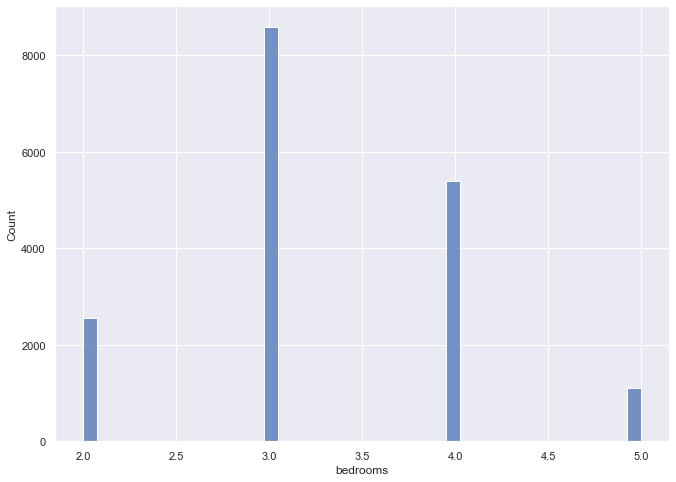

In [50]:
sns.histplot(df_outliers_rmvd["bedrooms"])

Still a bit crude but we can work with that for now.

Very crude correlation and normal distribution curve.

#### Bathrooms

In [51]:
df_outliers_rmvd.bathrooms.describe()

count    17627.000000
mean         2.012779
std          0.675859
min          0.500000
25%          1.500000
50%          2.000000
75%          2.500000
max          4.750000
Name: bathrooms, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

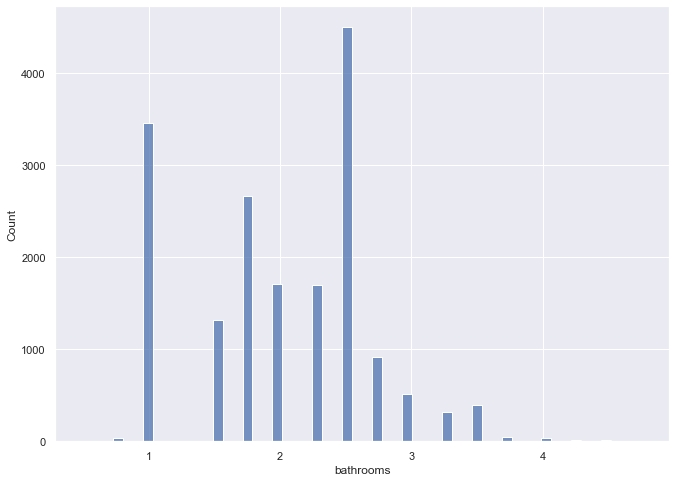

In [52]:
sns.histplot(df_outliers_rmvd["bathrooms"])

Now, trying to take out the outliers to hopefully normalize the distribution.

In [53]:
q3, q1 = np.percentile(df_outliers_rmvd["bathrooms"], [75 ,25])
iqr = q3 - q1
print("iqr=", iqr)
print("q3=", q3)
print("q1=", q1)
print("constant=", iqr*1.5)

iqr= 1.0
q3= 2.5
q1= 1.5
constant= 1.5


In [54]:
print("suspected outliers are greater than this number:", q3+(iqr*1.5))
print("suspected outliers are less than this number", q1-(iqr*1.5))

suspected outliers are greater than this number: 4.0
suspected outliers are less than this number 0.0


So regarding "sqft_living", any sqft_living value < 0 and > 4 are outliers. Again, any negative numbers, we can sort of ignore, unless negative values start appearing on our histogram plot.

Let's remove the outliers.

In [55]:
df_outliers_rmvd = df_outliers_rmvd[df_outliers_rmvd["bathrooms"] <= 4]
df_outliers_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17604 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     17604 non-null  int64  
 1   sqft_living  17604 non-null  int64  
 2   grade        17604 non-null  int64  
 3   condition    17604 non-null  int64  
 4   bathrooms    17604 non-null  float64
 5   bedrooms     17604 non-null  int64  
 6   waterfront   17604 non-null  int64  
 7   price        17604 non-null  int32  
 8   floors       17604 non-null  float64
 9   lat          17604 non-null  float64
 10  long         17604 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.5 MB


Let's see the new histogram plot.

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

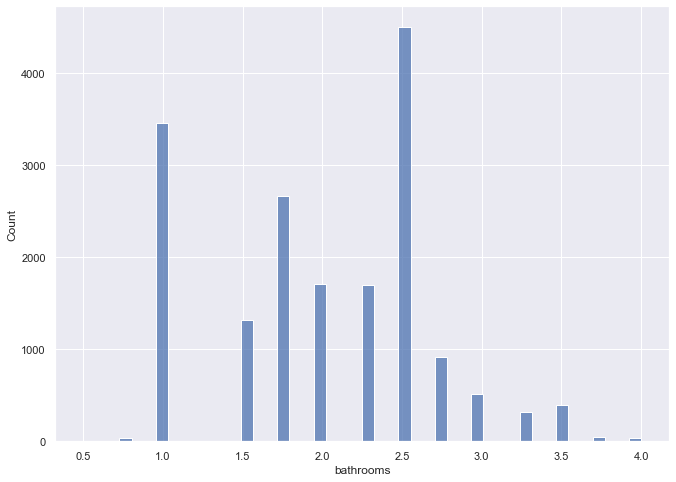

In [56]:
sns.histplot(df_outliers_rmvd["bathrooms"])

Still a bit crude but we can work with that for now.

Very crude correlation as well.

#### Grade

Now grade is one of those that need not remove outliers because we just need to understand what grade homes is considered more expensive. So just a correlation will do.

In [57]:
df_outliers_rmvd.grade.describe()

count    17604.000000
mean         7.460691
std          0.948117
min          4.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         11.000000
Name: grade, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='grade', ylabel='Count'>

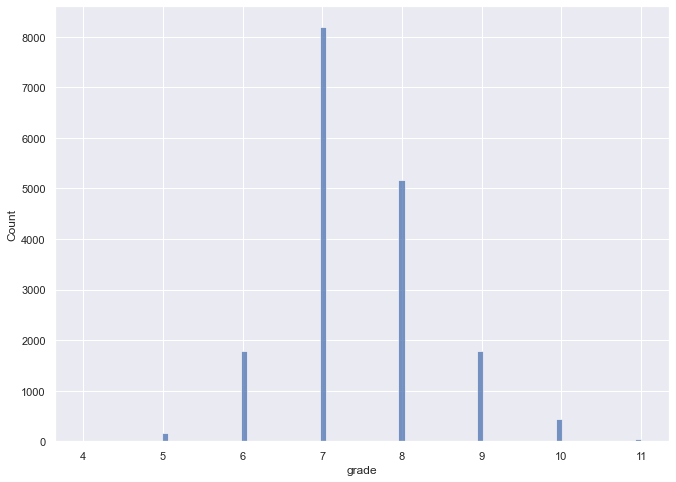

In [58]:
sns.histplot(df_outliers_rmvd["grade"])

A bit crude, but we will work that in with price later.

#### Condition

In [59]:
df_outliers_rmvd.condition.describe()

count    17604.000000
mean         3.411611
std          0.648609
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='condition', ylabel='Count'>

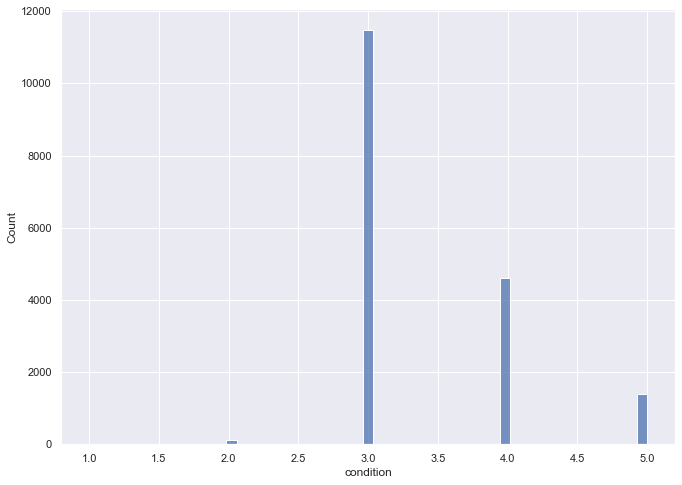

In [60]:
sns.histplot(df_outliers_rmvd["condition"])

Still a bit crude but we can work with that for now.

#### Floors

In [61]:
df_outliers_rmvd.floors.describe()

count    17604.000000
mean         1.473671
std          0.543801
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

Visual Plot: Initial Look

<AxesSubplot:xlabel='floors', ylabel='Count'>

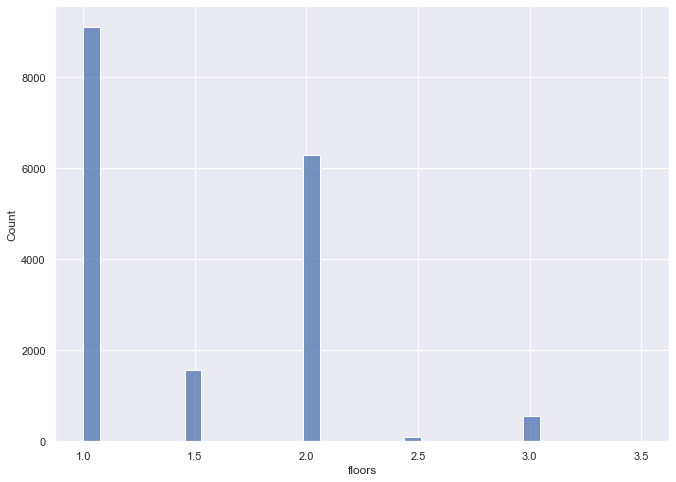

In [62]:
sns.histplot(df_outliers_rmvd["floors"])

No real correlation yet til we match with price.

#### Location

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

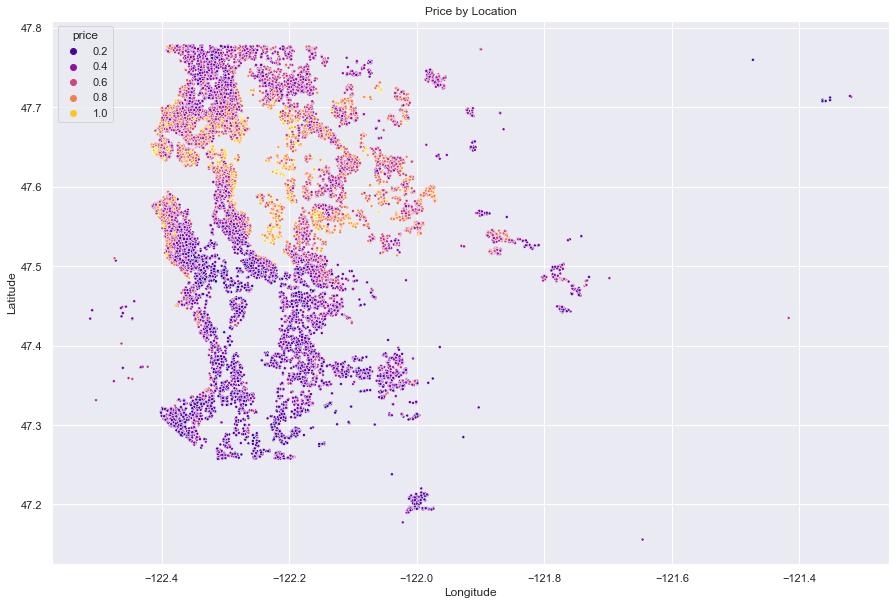

In [63]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_outliers_rmvd["long"], y=df_outliers_rmvd["lat"], hue=df_outliers_rmvd["price"], palette="plasma",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

Seems there is a general area from 47.55 North latitude to 47.7 North latitude, where most of the most expensive properties are located.

#### Waterfront

In [87]:
df_outliers_rmvd.waterfront.describe()

count    17604.000000
mean         0.001591
std          0.039851
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

<AxesSubplot:xlabel='waterfront', ylabel='Count'>

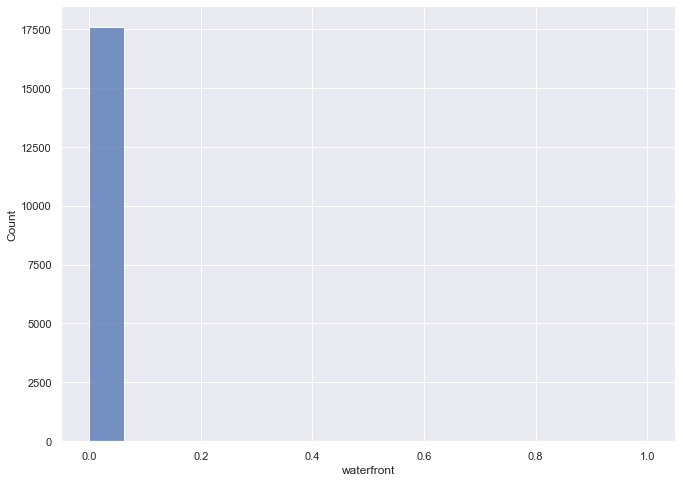

In [88]:
sns.histplot(df_outliers_rmvd["waterfront"])

For our analysis, we will exclude waterfront as a feature because it doesn't show discernibility, that it would impact price. Perhaps, with the removal of outliers, has skewed the model towards homes without waterfronts and it would be interesting to see the effect a waterfront has on the price. My prior limited background knowledge agrees with the fact that a waterfront property would be more expensive than a similar property without one.

But right now that is my speculation. 

### Looking at Multicolinearity

In [64]:
corr_matrix = df_outliers_rmvd.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price          1.000000
grade          0.592966
sqft_living    0.579716
lat            0.459020
bathrooms      0.403435
bedrooms       0.269527
floors         0.248990
condition      0.055789
waterfront     0.049695
long           0.019040
sqft_lot      -0.026175
Name: price, dtype: float64


Living area and grade have the highest correlations with price. Latitude visually showed more promise as a feature with a high correlation to price of the home.

## Data Modeling

Let's prepare a model and see where our features are at.

In [65]:
df_outliers_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17604 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_lot     17604 non-null  int64  
 1   sqft_living  17604 non-null  int64  
 2   grade        17604 non-null  int64  
 3   condition    17604 non-null  int64  
 4   bathrooms    17604 non-null  float64
 5   bedrooms     17604 non-null  int64  
 6   waterfront   17604 non-null  int64  
 7   price        17604 non-null  int32  
 8   floors       17604 non-null  float64
 9   lat          17604 non-null  float64
 10  long         17604 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.5 MB


#### Model 0

In [66]:
X = df_outliers_rmvd.drop("price", 1)
y = df_outliers_rmvd["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [67]:
predictors = sm.add_constant(X_train)
model_0 = sm.OLS(y_train , predictors).fit()
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2420.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:17:23   Log-Likelihood:            -1.8491e+05
No. Observations:               14083   AIC:                         3.698e+05
Df Residuals:                   14072   BIC:                         3.699e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.688e+07   1.05e+06    -35.250      0.000   -3.89e+07   -3.48e+07
sqft_lot       -5.5680      0.368    -15.118      0.000      -6.290      -4.846
sqft_living   132.9932      2.753     48.301      0.000     127.596     138.390
grade        7.466e+04   1608.671     46.414      0.000    7.15e+04    7.78e+04
condition    4.359e+04   1680.211     25.943      0.000    4.03e+04    4.69e+04
bathrooms   -1.262e+04   2407.930     -5.241      0.000   -1.73e+04   -7900.940
bedrooms    -1.124e+04   1707.328     -6.583      0.000   -1.46e+04   -7892.602
waterfront   3.334e+05   2.67e+04     12.480      0.000    2.81e+05    3.86e+05
floors      -1.127e+04   2598.797     -4.337      0.000   -1.64e+04   -6177.968
lat          5.917e+05   7650.533     77.337      0.000    5.77e+05    6.07e+05
long        -6.848e+04   8409.358     -8.143      0.000    -8.5e+04    -5.2e+04
==============================================================================
Omnibus:                     1591.683   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2832.856
Skew:                           0.766   Prob(JB):                         0.00
Kurtosis:                       4.576   Cond. No.                     8.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squred value is decent - An R^2 of 1 indicates that the regression predictions perfectly fit the data.
Near zero p-values indicated strong evidence that the null hypothesis be rejected.
<b>High Condition number</b>... something to watch out for too.

In [68]:
lr= LinearRegression()
lr.fit(X_train, y_train)

# Use Linear Regression to make predictions for train and test data
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)


# Calculate Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

# Calculate Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
train_mae = mean_absolute_error(y_train, y_hat_train)

print(f"Train Root Mean Square Error: {train_rmse}")
print(f"Test Root Mean Square Error: {test_rmse}")

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

Train Root Mean Square Error: 121883.44785013789
Test Root Mean Square Error: 118963.45174516343
Train Mean Absolute Error: 91959.1544447933
Test Mean Absolute Error: 89819.42589698173


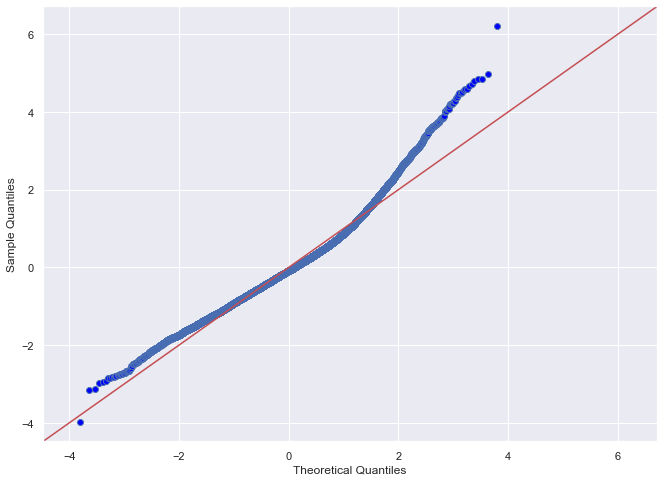

In [69]:
fig = sm.graphics.qqplot(model_0.resid, dist=stats.norm, line='45', fit=True)

This residual plot is not all that good, room for improvement.

#### Model 1.0

The main goal of this model is to see if scaling helps in any way.

In [70]:
price_log = np.log(df_outliers_rmvd.price)
price_log = pd.DataFrame(price_log)

In [71]:
X1 = df_outliers_rmvd.drop('price', 1)
y1 =price_log

In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=11)

In [73]:
scaler = StandardScaler()
scalerp = StandardScaler()

X_train1[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "lat", "long"]]  =scaler.fit_transform(X_train1[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "lat", "long"]])


X_test1[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "lat", "long"]] = scaler.transform(X_test1[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "lat", "long"]])


y_train1 = scalerp.fit_transform(pd.DataFrame(y_train1))
y_test1 = scalerp.transform(pd.DataFrame(y_test1))

<ipython-input-73-5824b7b0065a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "lat", "long"]]  =scaler.fit_transform(X_train1[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "lat", "long"]])
C:\Users\bigbenx3\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-73

In [74]:
predictors = sm.add_constant(X_train1)
model_1 = sm.OLS(y_train1 , predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2889.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:21:15   Log-Likelihood:                -12123.
No. Observations:               14083   AIC:                         2.427e+04
Df Residuals:                   14072   BIC:                         2.435e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7137      0.027    -26.085      0.000      -0.767      -0.660
sqft_lot       -0.1061      0.006    -17.893      0.000      -0.118      -0.094
sqft_living     0.4098      0.009     46.696      0.000       0.393       0.427
grade           0.3318      0.007     46.115      0.000       0.318       0.346
condition       0.2084      0.008     26.415      0.000       0.193       0.224
bathrooms       0.0009      0.008      0.112      0.911      -0.014       0.016
bedrooms       -0.0312      0.006     -4.952      0.000      -0.044      -0.019
waterfront      1.5593      0.125     12.432      0.000       1.313       1.805
floors         -0.0254      0.007     -3.825      0.000      -0.038      -0.012
lat             0.4744      0.005     95.280      0.000       0.465       0.484
long           -0.0233      0.005     -4.411      0.000      -0.034      -0.013
==============================================================================
Omnibus:                      192.624   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.541
Skew:                           0.084   Prob(JB):                     1.37e-73
Kurtosis:                       3.737   Cond. No.                         93.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The issue with the condition number is gone. And r-squared has jumped from 63% to 67%.
So, that's sort of the good news. 

The bad news: the r-squared is still too low.

In [75]:
lr1= LinearRegression()
lr1.fit(X_train1, y_train1)


# Use Linear Regression to make predictions for train and test data
y_hat_train = lr1.predict(X_train1)
y_hat_test = lr1.predict(X_test1)



# Undo scale
y_train1 = scalerp.inverse_transform(y_train1)
y_test1 = scalerp.inverse_transform(y_test1)
y_hat_train = scalerp.inverse_transform(y_hat_train)
y_hat_test = scalerp.inverse_transform(y_hat_test)

# Undo log
y_train1 = np.exp(y_train1)
y_test1 = np.exp(y_test1)
y_hat_train = np.exp(y_hat_train)
y_hat_test = np.exp(y_hat_test)


# Calculate Root Mean Square Error
train_rmse1 = np.sqrt(mean_squared_error(y_train1, y_hat_train))
test_rmse1 = np.sqrt(mean_squared_error(y_test1, y_hat_test))

# Calculate Mean Absolute Error
test_mae1 = mean_absolute_error(y_test1, y_hat_test)
train_mae1 = mean_absolute_error(y_train1, y_hat_train)

print(f'Train Root Mean Square Error: {train_rmse1}')
print(f'Test Root Mean Square Error: {test_rmse1}')

print(f'Train Mean Absolute Error: {train_mae1}')
print(f'Test Mean Absolute Error: {test_mae1}')

Train Root Mean Square Error: 124488.97003196516
Test Root Mean Square Error: 120574.03660898627
Train Mean Absolute Error: 89731.55925557266
Test Mean Absolute Error: 86592.15718283084


In [76]:
y_hat_test

array([[266679.09022698],
       [692917.92043294],
       [229329.63677108],
       ...,
       [442731.15968569],
       [459876.7656439 ],
       [609332.96175538]])

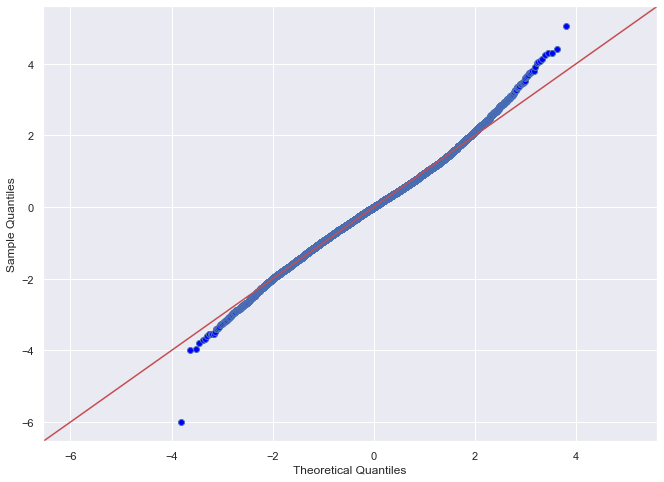

In [77]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

So here's the dilemma: we don't want a model to be too fitted, overfitted, because then it really isn't any use as a model to predict. It's nothing more than a glorified calculator that spit out calculations and numbers for existing data. 

However, we want it to have some degree of fit to the line so that it CAN be used as a model.

A happy medium somewhere in there...

In [78]:
results = [ ['Model 0', train_rmse, test_rmse, train_mae, test_mae],
            ['Model 1',train_rmse1, test_rmse1, train_mae1, test_mae1]]

df_results = pd.DataFrame(results, columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE'])
df_results

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Model 0,121883.447850,118963.451745,91959.154445,89819.425897
1,Model 1,124488.970032,120574.036609,89731.559256,86592.157183


## CRITICAL-Model Decision

I think I'll go with model 2 because the scaling brought down the condition number, visually it was more aesthetically pleasing.

#### Choosing the Model

Typically lower RSME shows better fit to the line.

In [80]:
Xf = df_outliers_rmvd.drop('price', 1)

scalerf= StandardScaler()

Xf[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "condition", "lat", "long"]]  =scalerf.fit_transform(Xf[["sqft_lot", "sqft_living", "bathrooms", "bedrooms", "floors", "grade", "condition", "lat", "long"]])

scalerfp = StandardScaler()

price_sc = scalerp.transform(pd.DataFrame(df_outliers_rmvd.price))

y_hat = lr1.predict(Xf)

y_hat = np.exp(scalerp.inverse_transform(y_hat))

y_hat

rmse_f = np.sqrt(mean_squared_error(df_outliers_rmvd.price , y_hat))
mae_f = mean_absolute_error(df_outliers_rmvd.price, y_hat)

In [81]:
print(f'Root Mean Square Error: {rmse_f}')
print(f'Mean Absolute Error: {mae_f}')


Root Mean Square Error: 183833.88236696075
Mean Absolute Error: 140227.95035117553


In [82]:
mae_f

140227.95035117553

In [83]:
mae_f/df_outliers_rmvd.price.mean()

0.3028492292660915

<AxesSubplot:ylabel='Count'>

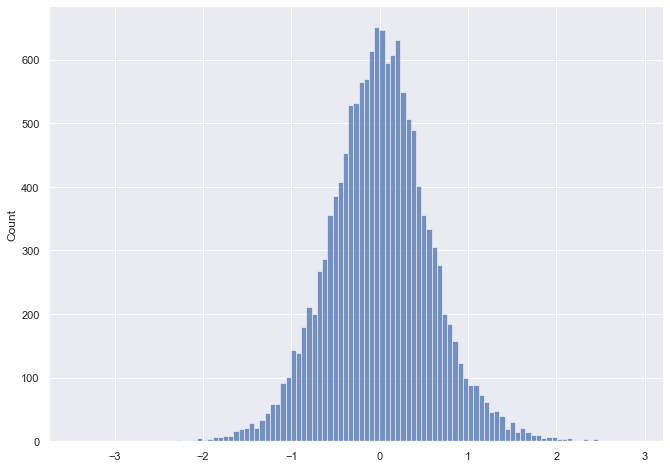

In [84]:
sns.histplot(model_1.resid)

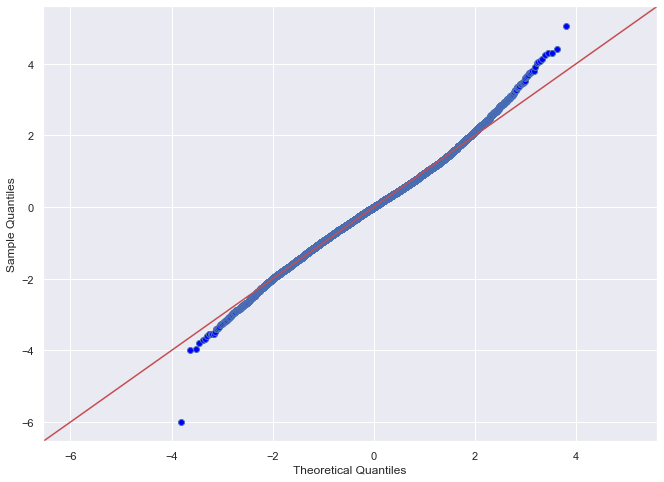

In [85]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

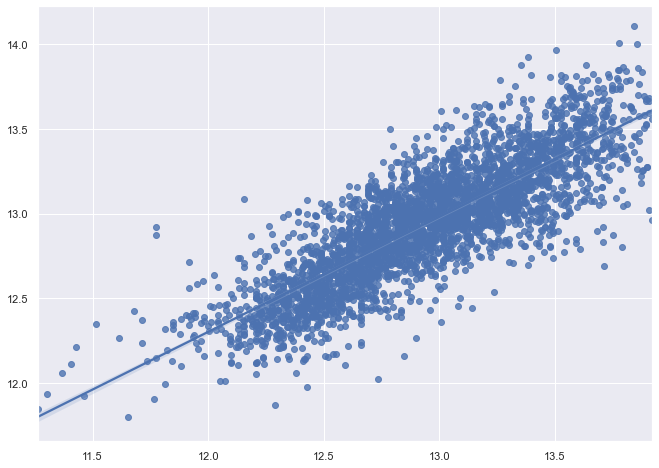

In [86]:
sns.regplot(x=np.log(y_test1), y=np.log(y_hat_test))

The majority of the plot conforms to the best fit line.

## Data Question - Answers:

1. The factors most affecting the price of a house are:

* Location(lat)

* Quality of the house(grade)

* Living area(sqft_living)

* With a Mean Squared Error of around 140227 USD, that means our predicted price is, on average, 140227 USD off from our mean. While that number doesn't look too bad our Root Mean Squared Error is around 183833 USD which means that our model is being heavily penalized for predictions that are very far off the actual price.


## Conclusions:

* We have a model that has an Coefficient of Determination(R-squared) value of 0.672 which indicates that our model can explain 67.2% of all variation in the data around the mean.

* With a Mean Squared Error of around 140227 USD, that means our predicted price is, on average, 140227 USD off from our mean. While that number doesn't look too bad our Root Mean Squared Error is around 183833 USD which means that our model is being heavily penalized for predictions that are very far off the actual price.


## Future Research

* The data we were provided was from 2014 to 2015. And such outdated data may not give us the optimal insights relevant to today's housing situation

* We should be able to get a lot more out of the location data, with further analysis, incorporating data relevant to the zipcode so there is a better determination for prices that can be expected in a more defined area.

* Also, streamlining the methods of getting a more fitted model without going too far into "overfitted" territory. 
  Like I've mentioned before, there is a happy medium in there.

* The most obvious next step is to try out new modeling techniques.  While linear regression is a good start, there are many other techniques that I believe could help make better predictions.  Of particular interest to me in this context are Polynomial Regression and Weighted Least Squares, that might be promising.

## Presentation Prep

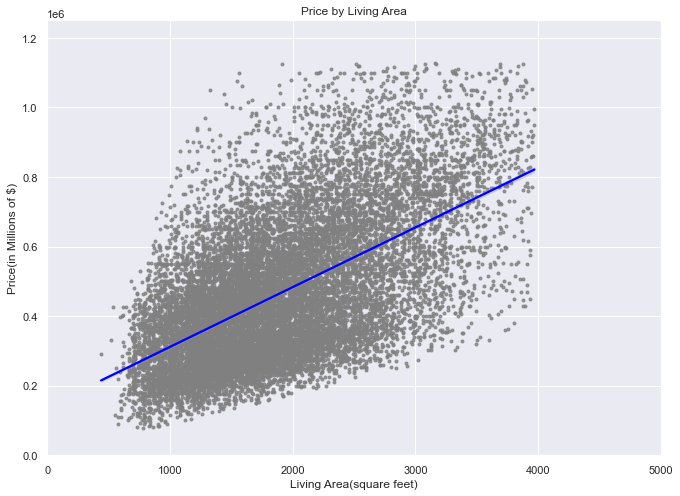

In [96]:
fig = plt.figure(figsize=(11,8))
ax = sns.regplot(data=df_outliers_rmvd, x="sqft_living", y="price", marker=".",
     scatter_kws={"color": "grey"}, line_kws={"color": "blue"})

ax.set(  xlabel="Living Area(square feet)",
         ylabel="Price(in Millions of $)", 
         title="Price by Living Area",
 )


plt.xlim([0,5000])
plt.ylim([0, 1250000])
plt.show()

In [91]:
df_outliers_rmvd.grade.describe()

count    17604.000000
mean         7.460691
std          0.948117
min          4.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         11.000000
Name: grade, dtype: float64

[[Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '6'),
  Text(3, 0, '7'),
  Text(4, 0, '8'),
  Text(5, 0, '9'),
  Text(6, 0, '10'),
  Text(7, 0, '11')],
 Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price (in Thousands of $)'),
 Text(0.5, 1.0, 'Price by Grade')]

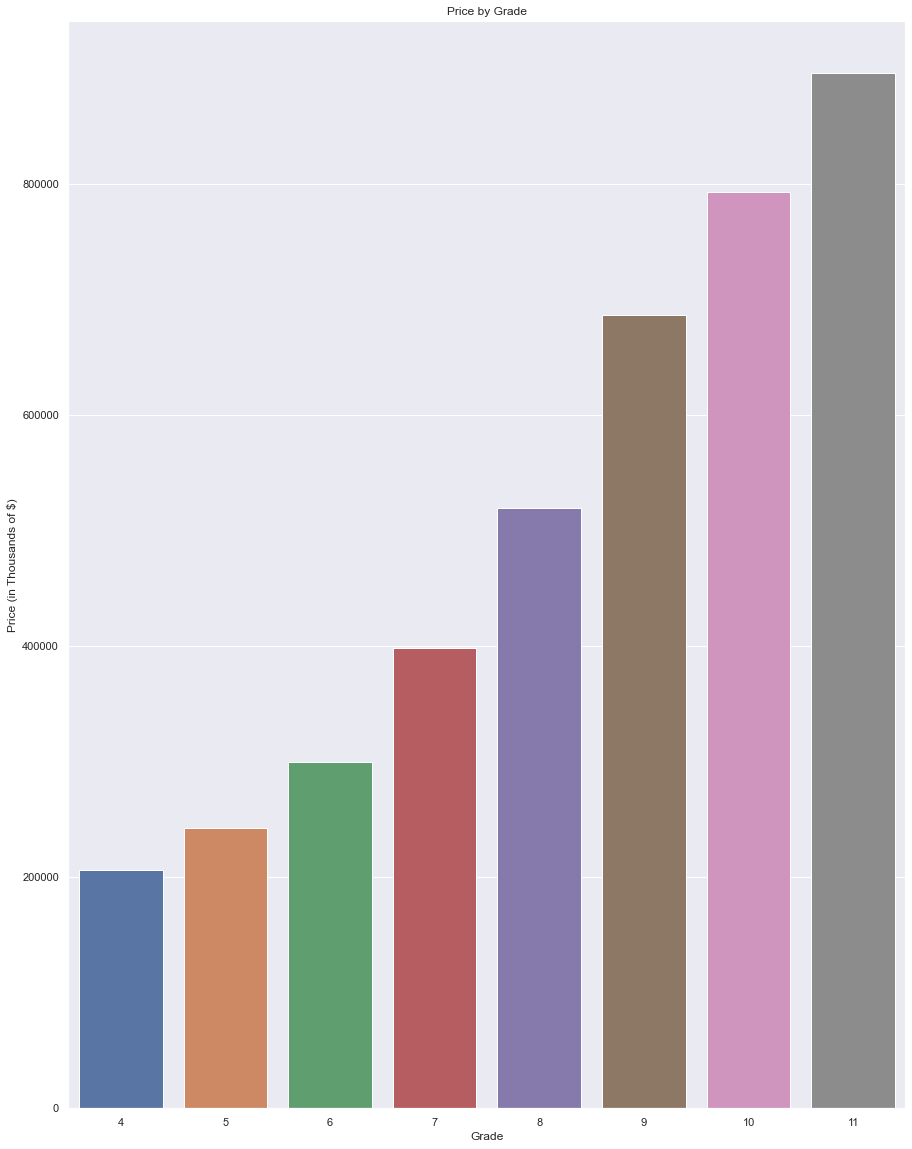

In [99]:
fig = plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_outliers_rmvd, x="grade", y="price", ci=None)
ax.set( xticklabels=(["4","5", "6", "7", "8", "9", "10", "11"]),
        xlabel="Grade",
        ylabel="Price (in Thousands of $)", 
        title="Price by Grade"  )